In [1]:
import numpy as np
import pandas as pd

#### 1. Load the data

Read the “housing.xlxs file from the folder into the program.

Print first few rows of this data.

In [2]:
df_housing = pd.read_excel('housing.xlsx')
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


#### Extract input (X) and output (Y) data from the dataset.

In [3]:
input_x = df_housing.drop('median_house_value', axis = 1)
output_y = df_housing['median_house_value']

#### 2. Handle missing values

In [4]:
input_x.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [5]:
input_x['total_bedrooms'].fillna(input_x['total_bedrooms'].median(), inplace=True)

In [6]:
ocean = pd.get_dummies(input_x['ocean_proximity'], prefix = 'Ocean_Prox')
input_x = pd.concat([input_x, ocean], axis = 1)
input_x.drop('ocean_proximity', axis = 1, inplace=True)
input_x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Ocean_Prox_<1H OCEAN,Ocean_Prox_INLAND,Ocean_Prox_ISLAND,Ocean_Prox_NEAR BAY,Ocean_Prox_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0


#### 4. Split the dataset into training and test dataset (80%, 20%)

In [7]:
from sklearn.model_selection import train_test_split

input_train, input_test, output_train, output_test = train_test_split(input_x, output_y, test_size = 0.2, random_state=42)

#### 5. Standardize the data

In [8]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
arr = ss.fit_transform(input_train)
input_train = pd.DataFrame(arr, columns = input_train.columns)

ss = StandardScaler()
arr = ss.fit_transform(input_test)
input_test = pd.DataFrame(arr, columns = input_test.columns)

#### 6. Perform Linear Regression

    Perform Linear Regression on training data.
    Predict output for test dataset using the fitted model.
    Print root mean squared error (RMSE) from Linear Regression.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression()
model.fit(input_train, output_train)

train_pred = model.predict(input_train)
test_pred = model.predict(input_test)

print('Train R2 Score: ', r2_score (output_train, train_pred))
print('Test R2 Score: ', r2_score(output_test, test_pred))

print('RMSE: ', np.sqrt(mean_squared_error(output_test, test_pred)))

Train R2 Score:  0.6496648627123223
Test R2 Score:  0.6247352044674395
RMSE:  70124.9140665144


#### 7. Perform Decision Tree Regression

    Perform Decision Tree Regression on training data.
    Predict output for test dataset using the fitted model.
    Print root mean squared error from Decision Tree Regression.

In [10]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(input_train, output_train)

train_pred = model.predict(input_train)
test_pred = model.predict(input_test)

print('Train R2 Score: ', r2_score (output_train, train_pred))
print('Test R2 Score: ', r2_score(output_test, test_pred))

print('RMSE: ', np.sqrt(mean_squared_error(output_test, test_pred)))

Train R2 Score:  1.0
Test R2 Score:  0.4676132090028142
RMSE:  83525.11184186308


#### 8. Perform Random Forest Regression

    Perform Random Forest Regression on training data.
    Predict output for test dataset using the fitted model.
    Print RMSE (root mean squared error) from Random Forest Regression.

In [11]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(input_train, output_train)

train_pred = model.predict(input_train)
test_pred = model.predict(input_test)

print('Train R2 Score: ', r2_score (output_train, train_pred))
print('Test R2 Score: ', r2_score(output_test, test_pred))

print('RMSE: ', np.sqrt(mean_squared_error(output_test, test_pred)))

Train R2 Score:  0.9752017403545833
Test R2 Score:  0.7159398001075327
RMSE:  61011.067545158876


#### 9. Bonus exercise: Perform Linear Regression with one independent variable

    Extract just the median_income column from the independent variables (from X_train and X_test).
    Perform Linear Regression to predict housing values based on median_income.
    Predict output for test dataset using the fitted model.
    Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [12]:
input_train_income = pd.DataFrame(input_train['median_income'], columns = ['median_income'])
input_test_income = pd.DataFrame(input_test['median_income'], columns = ['median_income'])

model = LinearRegression()
model.fit(input_train_income, output_train)

train_pred = model.predict(input_train_income)
test_pred = model.predict(input_test_income)

print('Train R2 Score: ', r2_score (output_train, train_pred))
print('Test R2 Score: ', r2_score(output_test, test_pred))

print('RMSE: ', np.sqrt(mean_squared_error(output_test, test_pred)))

Train R2 Score:  0.4769927345820525
Test R2 Score:  0.4583869568059462
RMSE:  84245.74734275104


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

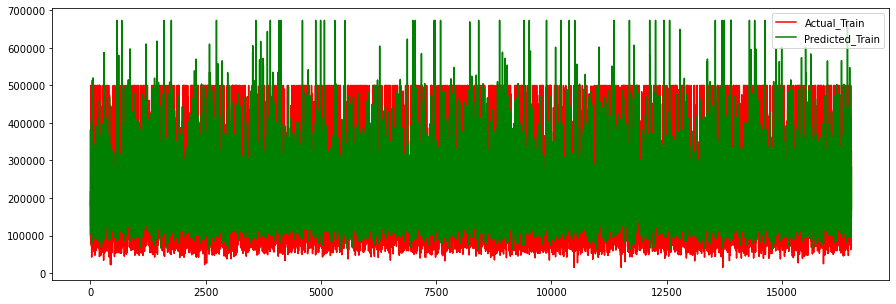

In [14]:
res = pd.DataFrame({'actual':output_train, 'predicted':train_pred}).reset_index(drop = True)

fig = plt.figure(figsize = (15,5))
plt.plot(res.index,res['actual'], color = 'red', label = 'Actual_Train')
plt.plot(res.index, res['predicted'],color = 'green', label = 'Predicted_Train')
plt.legend()
plt.show()

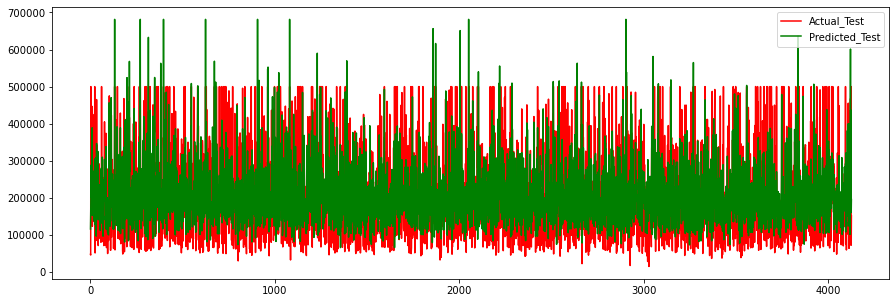

In [15]:
res = pd.DataFrame({'actual':output_test, 'predicted':test_pred}).reset_index(drop = True)

fig = plt.figure(figsize = (15,5))
plt.plot(res.index,res['actual'], color = 'red', label = 'Actual_Test')
plt.plot(res.index, res['predicted'],color = 'green', label = 'Predicted_Test')
plt.legend()
plt.show()